<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.3.1 
# *Support Vector Machines*

SVMs use linear algebra to find an (n-1)-dimensional boundary that separates classes within an n-dimensional space. In practical terms, this technique provides a conceptually simple way to predict class membership from a set of features. 

The standard (linear) SVM is immediately applicable to linear classification problems. Furthermore, by applying transformations to the feature space it is possible to tackle nonlinear classification problems. These transforms are called *kernels*.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

# from ipywidgets import *
# from IPython.display import display

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
# Load dataset
breast_cancer_csv = '../../DATA/breast-cancer-wisconsin-data.csv'
breast_cancer = pd.read_csv(breast_cancer_csv, index_col='id')

### 2. EDA 

- Explore dataset. Clean data (if required)
- Find features to predict class

In [6]:
# Head
breast_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
# Shape
breast_cancer.shape

(569, 32)

In [8]:
# Descriptive statistics
breast_cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [9]:
# Df summary
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [10]:
# Missing values
breast_cancer.isna().sum().sum()

569

In [11]:
# Remove feature w/ NaNs
breast_cancer.drop(labels='Unnamed: 32', axis=1, inplace=True)

In [12]:
# Missing values
breast_cancer.isna().sum().sum()

0

In [13]:
# Replace white spaces w/ _
breast_cancer.columns = breast_cancer.columns.str.replace(' ', '_')

In [14]:
# Percentage diagnosis values
breast_cancer['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [15]:
# Map diagnosis values: benign to 0 and malignant to 1
bm_map = {'B': 0, 'M': 1}

breast_cancer['diagnosis'] = breast_cancer['diagnosis'].map(bm_map)

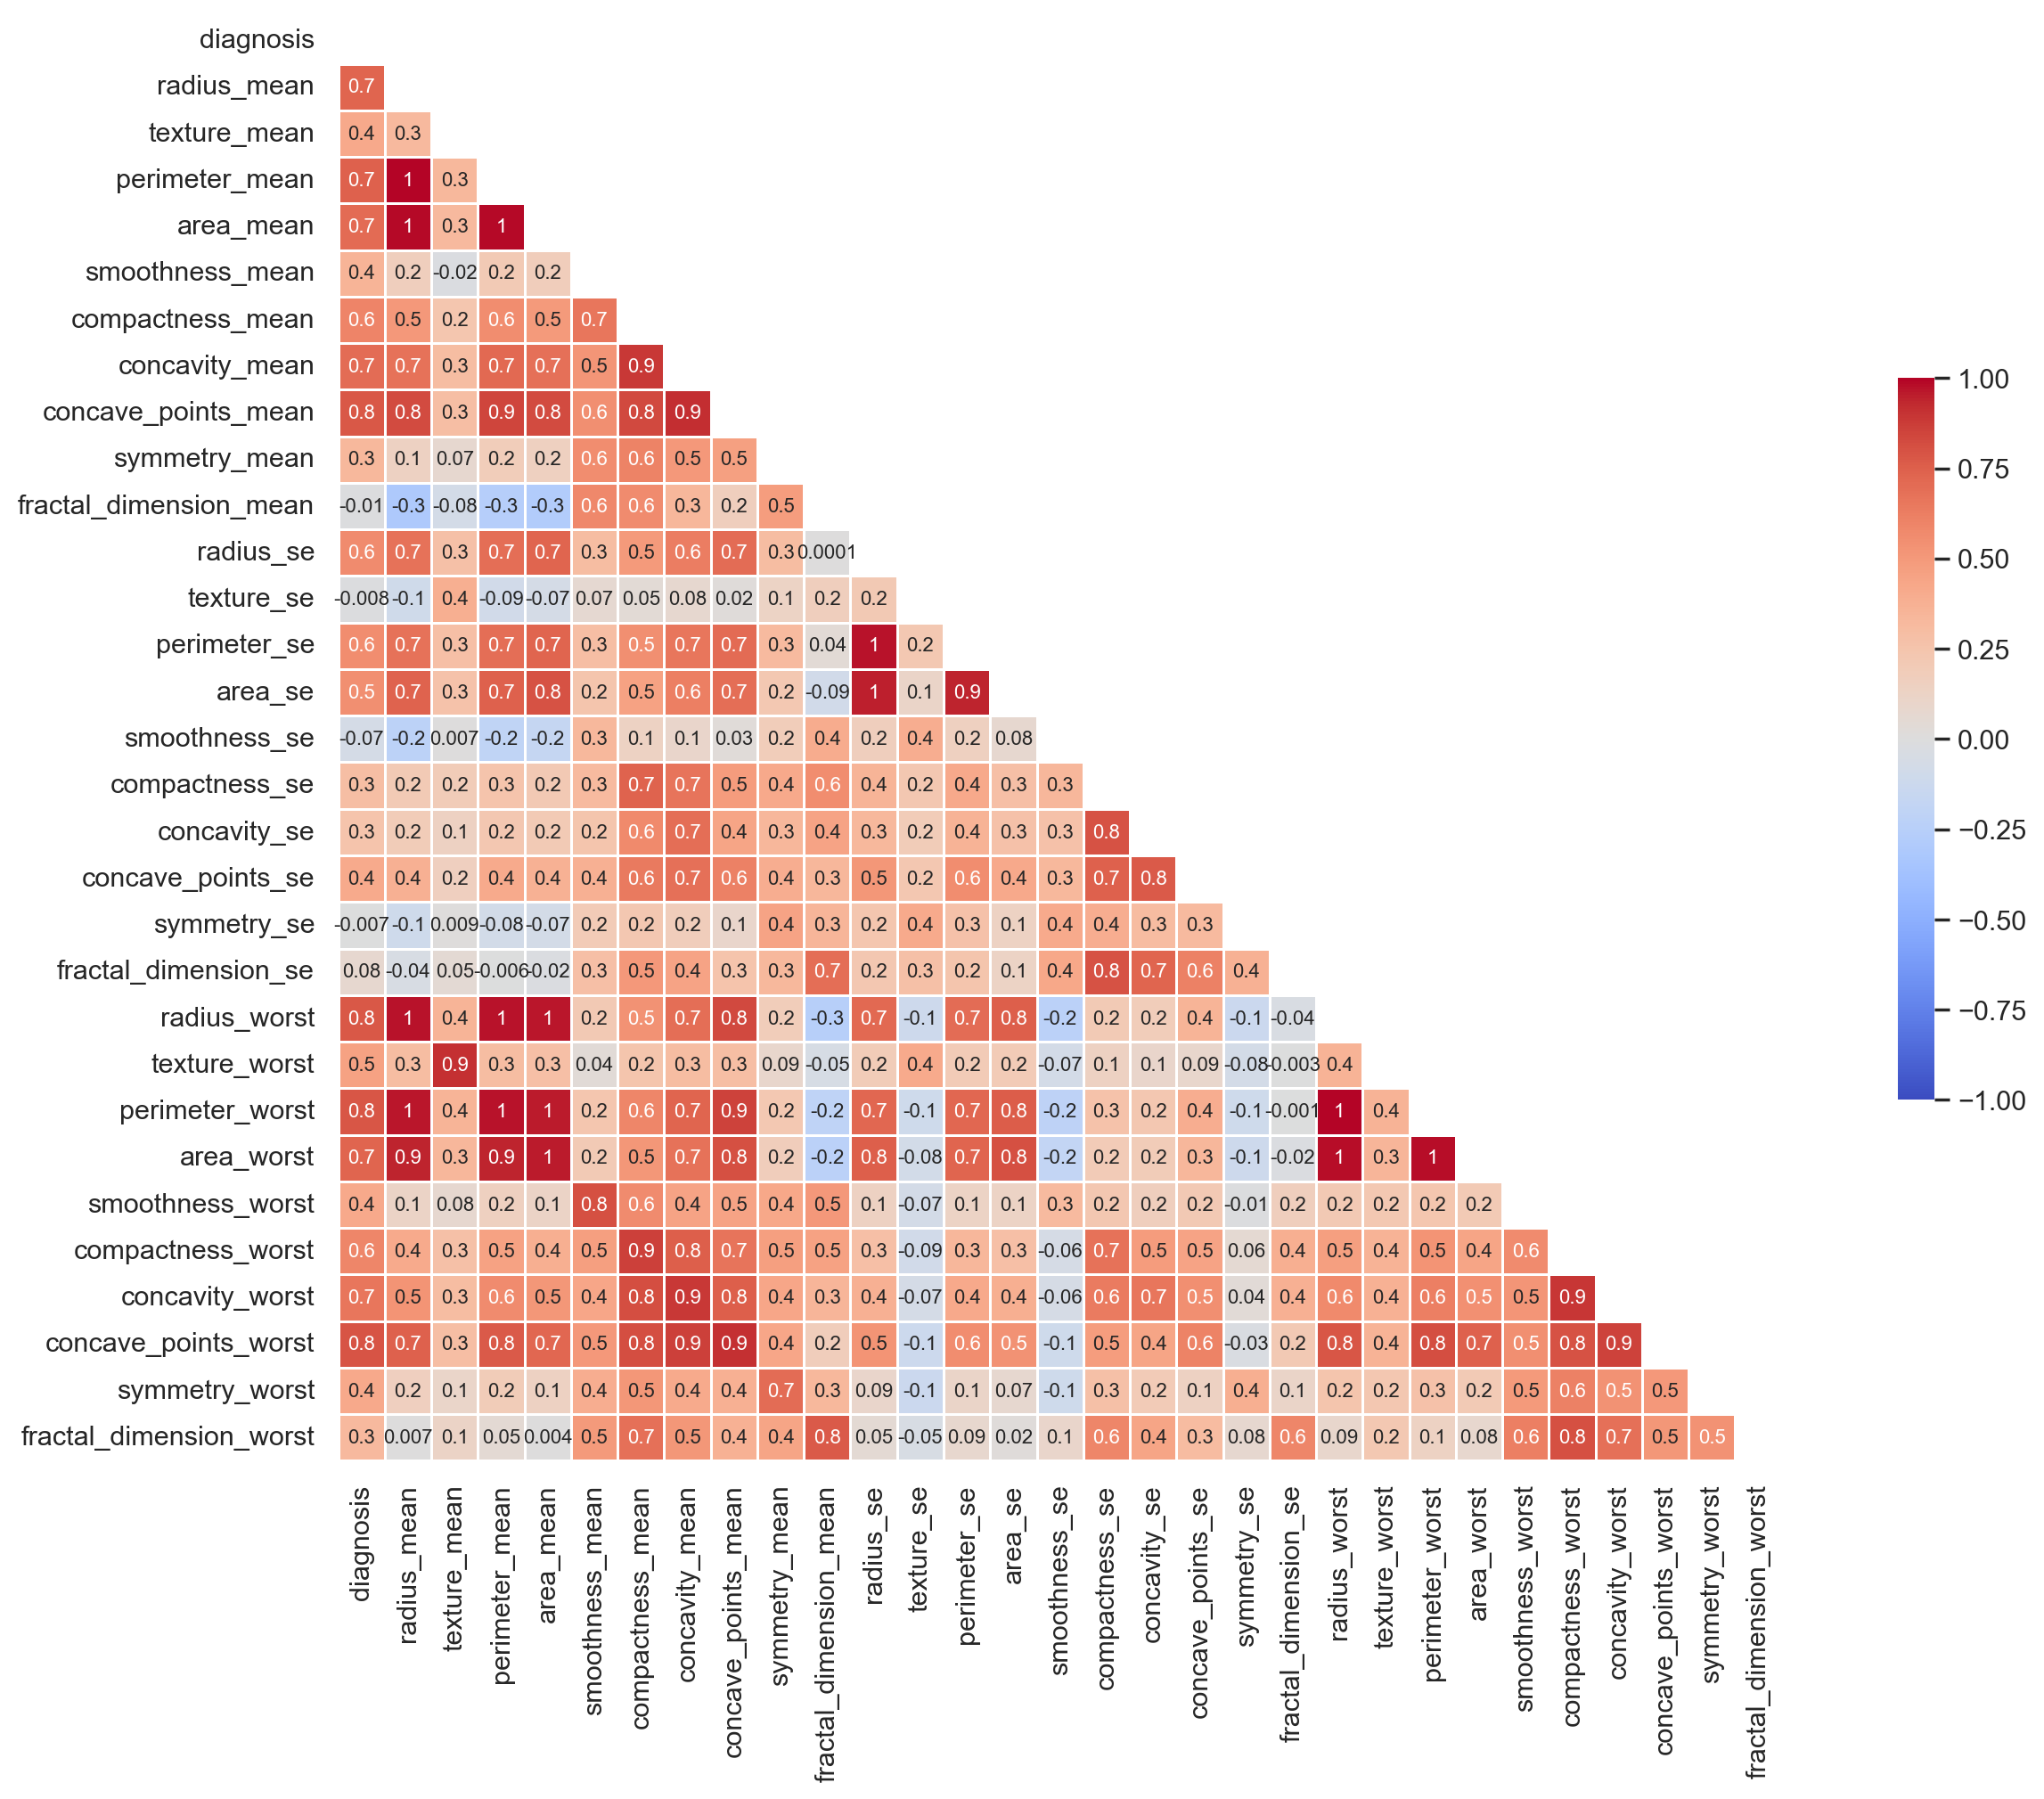

In [16]:
# Correlation heatmap
sns.set_theme(style="white")
plt.figure(figsize=(15,10))

# Generate mask for upper triangle
mask = np.zeros_like(breast_cancer.corr(), dtype=bool) #generate mask of "0's"
mask[np.triu_indices_from(mask)] = True #return upper triangle
# Set diverging colormap
cmap = sns.color_palette('coolwarm', as_cmap=True)
# Draw heatmap with mask and correct aspect ratio
sns.heatmap(breast_cancer.corr(), mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, fmt='.1g',
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"size": 8}, annot=True);

### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [100]:
# Define predictors and target
target_col = 'diagnosis'
feature_cols = [c for c in breast_cancer.columns if c != target_col]

X = breast_cancer[feature_cols]
y = breast_cancer[target_col]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [71]:
# Make pipeline 
lr_pipe = make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear')) #StandardScaler(): Standardize features by removing the mean and scaling to unit variance

# Fit pipeline
lr_pipe.fit(X_train, y_train)  #Apply scaling on training data

print(f'Model 1 (LogReg): Accuracy score (train) is {lr_pipe.score(X_train, y_train):7.4f}')
print(f'Model 1 (LogReg): Accuracy score (test) is {lr_pipe.score(X_test, y_test):7.4f}') #Apply scaling on test data, without leaking training data

Model 1 (LogReg): Accuracy score (train) is  0.9912
Model 1 (LogReg): Accuracy score (test) is  0.9825


In [72]:
# Predict test class
lr_y_pred_test = lr_pipe.predict(X_test)

# Predict test probability
lr_y_pred_proba = lr_pipe.predict_proba(X_test)

In [73]:
# Classification report
print(metrics.classification_report(y_test, lr_y_pred_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



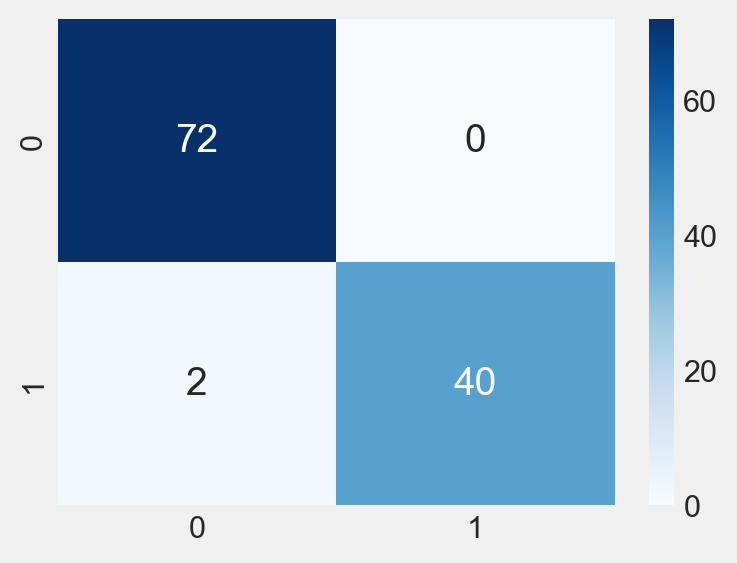

In [95]:
# Plot confusion matrix
confusion = metrics.confusion_matrix(y_test, lr_y_pred_test)
plt.figure(figsize=(4,3))
sns.heatmap(confusion, annot=True, cmap=plt.cm.Blues, fmt="d");

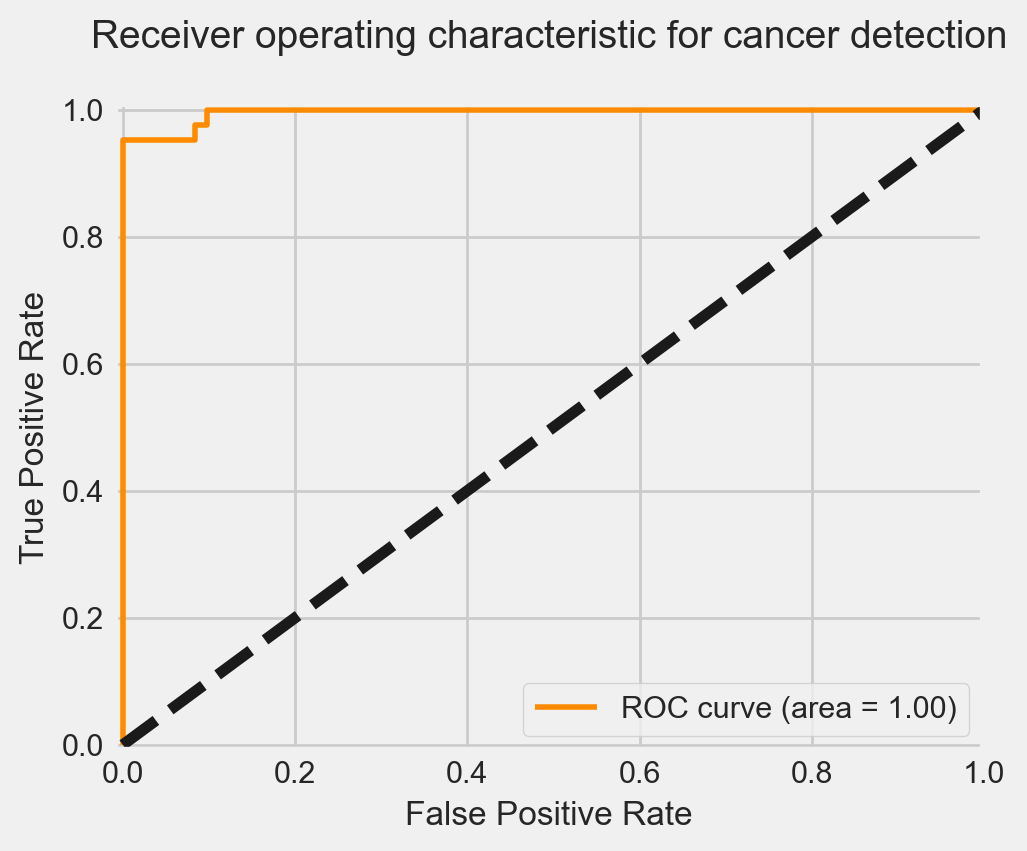

In [75]:
# Plot ROC curve for class 1 (has_cancer)
lr_fpr, lr_tpr, _ = metrics.roc_curve(y_test, lr_y_pred_proba[:,1]) #_: threshold
lr_roc_auc = metrics.auc(lr_fpr, lr_tpr)

plt.figure(figsize=(5,4))
plt.plot(lr_fpr, lr_tpr, color='darkorange', lw = 2, label = f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver operating characteristic for cancer detection', pad=20, fontsize=14)
plt.legend(loc="lower right");

### 4. Support Vector Machine

#### 4.1 Use Support Vector Machine

Use Support Vector Machine and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [76]:
# Make pipeline 
svm_pipe = make_pipeline(StandardScaler(), SVC(kernel='linear', probability=True)) #StandardScaler(): Standardize features by removing the mean and scaling to unit variance

# Fit pipeline
svm_pipe.fit(X_train, y_train)  #Apply scaling on training data

print(f'Model 2 (SVM): Accuracy score (train) is {svm_pipe.score(X_train, y_train):7.4f}')
print(f'Model 2 (SVM): Accuracy score (test) is {svm_pipe.score(X_test, y_test):7.4f}') #Apply scaling on test data, without leaking training data

Model 2 (SVM): Accuracy score (train) is  0.9868
Model 2 (SVM): Accuracy score (test) is  0.9649


In [77]:
# Predict test class
svm_y_pred_test = svm_pipe.predict(X_test)

# Predict test probability
svm_y_pred_proba = svm_pipe.predict_proba(X_test)

In [78]:
# Classification report
print(metrics.classification_report(y_test, svm_y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



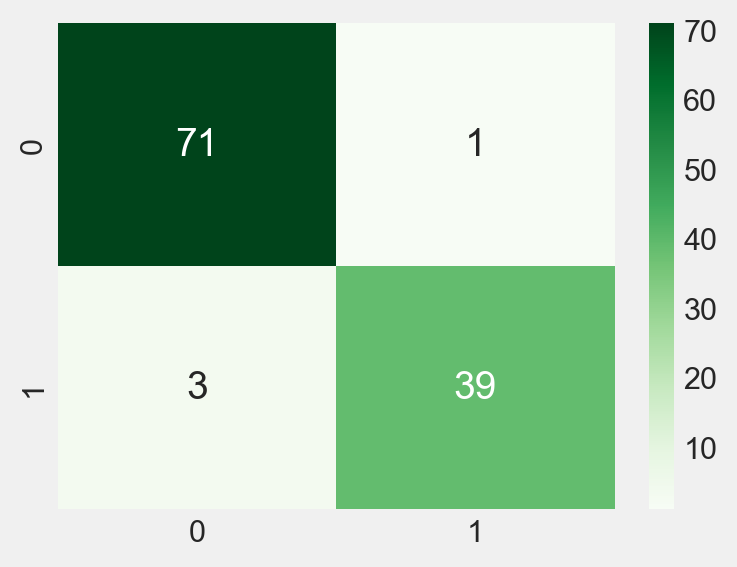

In [97]:
# Plot confusion matrix
confusion = metrics.confusion_matrix(y_test, svm_y_pred_test)
plt.figure(figsize=(4,3))
sns.heatmap(confusion, annot=True, cmap=plt.cm.Greens, fmt="d");

In [118]:
## Standardization and fitting w/o pipeline

# Instantiate scaler
scaler = StandardScaler()

# Fit scaler
scaler.fit(X_train) #Compute the mean and std to be used for later scaling

# Transform data
X_train_scaled = scaler.transform(X_train) #Perform standardization by centering and scaling

# Or both together
# X_train_scaled = scaler.fit_transform(X_train)

In [119]:
X_train_scaled

array([[ 1.0449852 ,  0.29708512,  1.01044815, ...,  1.21839781,
         0.29811854,  0.08380738],
       [ 1.68141074, -1.14098169,  1.70338066, ...,  0.69716372,
        -0.88595033, -0.41234747],
       [-1.44260855, -1.12732916, -1.4504636 , ..., -1.52233766,
         0.1807324 , -0.33657109],
       ...,
       [ 0.82638686,  1.17539807,  0.86625411, ...,  1.10638475,
         0.72853438,  3.02284824],
       [-0.05077356,  0.43133503, -0.11146165, ..., -0.54050588,
        -1.1207226 , -0.44903285],
       [-0.32748032, -0.21260945, -0.39904866, ..., -0.98109057,
        -1.52732096, -1.31985978]])

In [120]:
# Initialize SVM classifier
clf = SVC(kernel='linear', probability=True)

# Fit data
clf = clf.fit(X_train_scaled, y_train)

In [122]:
# Number of support vectors
len(clf.support_vectors_)

35

In [121]:
# Coordinates of support vectors
clf.support_vectors_

array([[ 0.72677243,  0.02403446,  0.63394147, ..., -0.46986298,
        -0.60864684, -1.43833554],
       [ 0.41962793, -1.83726087,  0.40963962, ...,  0.43878693,
        -0.55760939, -0.10984336],
       [ 0.21486493,  0.62702133,  0.19855556, ...,  0.22372186,
         0.47334712,  0.53365443],
       ...,
       [-0.6788979 , -0.27632127, -0.70385886, ..., -0.66043453,
        -1.5426322 , -0.87121552],
       [ 0.07374448,  0.47911889,  0.06717876, ...,  0.09976075,
         0.2300686 , -0.91271211],
       [-0.09781371, -0.55164735, -0.06459858, ...,  0.74047543,
         1.26783011,  1.33892878]])

### 5. Naive Bayes
#### 5.1 Use Naive Bayes

Use Naive Bayes and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [80]:
# Make pipeline 
nb_pipe = make_pipeline(StandardScaler(), GaussianNB()) #StandardScaler(): Standardize features by removing the mean and scaling to unit variance

# Fit pipeline
nb_pipe.fit(X_train, y_train)  #Apply scaling on training data

print(f'Model 3 (Naive Bayes): Accuracy score (train) is {nb_pipe.score(X_train, y_train):7.4f}')
print(f'Model 3 (Naive Bayes): Accuracy score (test) is {nb_pipe.score(X_test, y_test):7.4f}') #Apply scaling on test data, without leaking training data

Model 3 (Naive Bayes): Accuracy score (train) is  0.9341
Model 3 (Naive Bayes): Accuracy score (test) is  0.9474


In [81]:
# Predict test class
nb_y_pred_test = nb_pipe.predict(X_test)

# Predict test probability
nb_y_pred_proba = nb_pipe.predict_proba(X_test)

In [82]:
# Classification report
print(metrics.classification_report(y_test, nb_y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



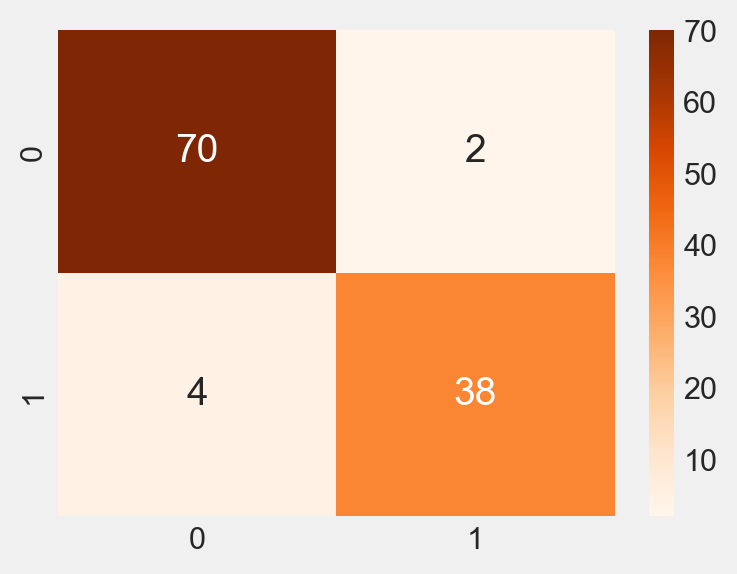

In [98]:
# Plot confusion matrix
confusion = metrics.confusion_matrix(y_test, nb_y_pred_test)
plt.figure(figsize=(4,3))
sns.heatmap(confusion, annot=True, cmap=plt.cm.Oranges, fmt="d");

### 6 Gridsearch optimal parameters for all three models.

Is there any difference between accuracy score of Logistic Regression and SVM? Use grid serach to find optimal parameter for both these models.

> Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.

> It is possible and recommended to search the hyper-parameter space for the best cross validation score.

> https://scikit-learn.org/stable/modules/grid_search.html#grid-search

**Note:** It'll take time to execute this. After running the cell, wait for result.

#### 6.1 Find Best Estimator For Logistic Regression 

Find out how these parameters effect model. Find out the best estimator, score.

In [125]:
# GridSearch parameter values for estimator (aka model)
lr_params = {'penalty': ['l1','l2'],
             'C': [1, 10, 100]}

In [126]:
# Perform GridSearch for LogReg
lr_gs = GridSearchCV(LogisticRegression(max_iter=10000), lr_params, cv=5, verbose=1)
lr_gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\stoll\anaconda3\envs\iod_py39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\stoll\anaconda3\envs\iod_py39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\stoll\anaconda3\envs\iod_py39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\stoll\anaconda3\envs\iod_py39\lib\site-packages\sklearn\linear_model\_logistic.py

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [1, 10, 100], 'penalty': ['l1', 'l2']},
             verbose=1)

In [127]:
# Save best estimator
best_lr = lr_gs.best_estimator_

In [128]:
# Print best parameter and score
print(lr_gs.best_params_)
print(lr_gs.best_score_)

{'C': 100, 'penalty': 'l2'}
0.9613569321533924


#### 6.2 Find Best Estimator For SVM

Find out how these parameters effect model. Find out the best estimator, score.

In [134]:
# GridSearch parameter values for estimator (aka model)
svc_params = {'C': [1, 10, 100],
              'gamma': [0.001, 0.0001],
              'kernel': ['linear','rbf']}

In [ ]:
# Perform GridSearch for SVM (execution can take quite a while)
# svc_gs = GridSearchCV(SVC(probability=True), svc_params, cv=5, verbose=1)
# svc_gs.fit(X, y)

In [137]:
# Alternatively, perform RandomizedSearch for SVM
svc_gs = RandomizedSearchCV(SVC(probability=True), svc_params, cv=5, verbose=1)
svc_gs.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVC(probability=True),
                   param_distributions={'C': [1, 10, 100],
                                        'gamma': [0.001, 0.0001],
                                        'kernel': ['linear', 'rbf']},
                   verbose=1)

In [140]:
# Save best estimator
best_svc = svc_gs.best_estimator_

In [141]:
# Print best parameter and score
print(svc_gs.best_params_)
print(svc_gs.best_score_)

{'kernel': 'linear', 'gamma': 0.001, 'C': 100}
0.9543393882937432


#### 6.3 Plot the ROC curve for the SVM, Logistic Regressions and Naive Bayes on the same plot

Find out which model performs better.

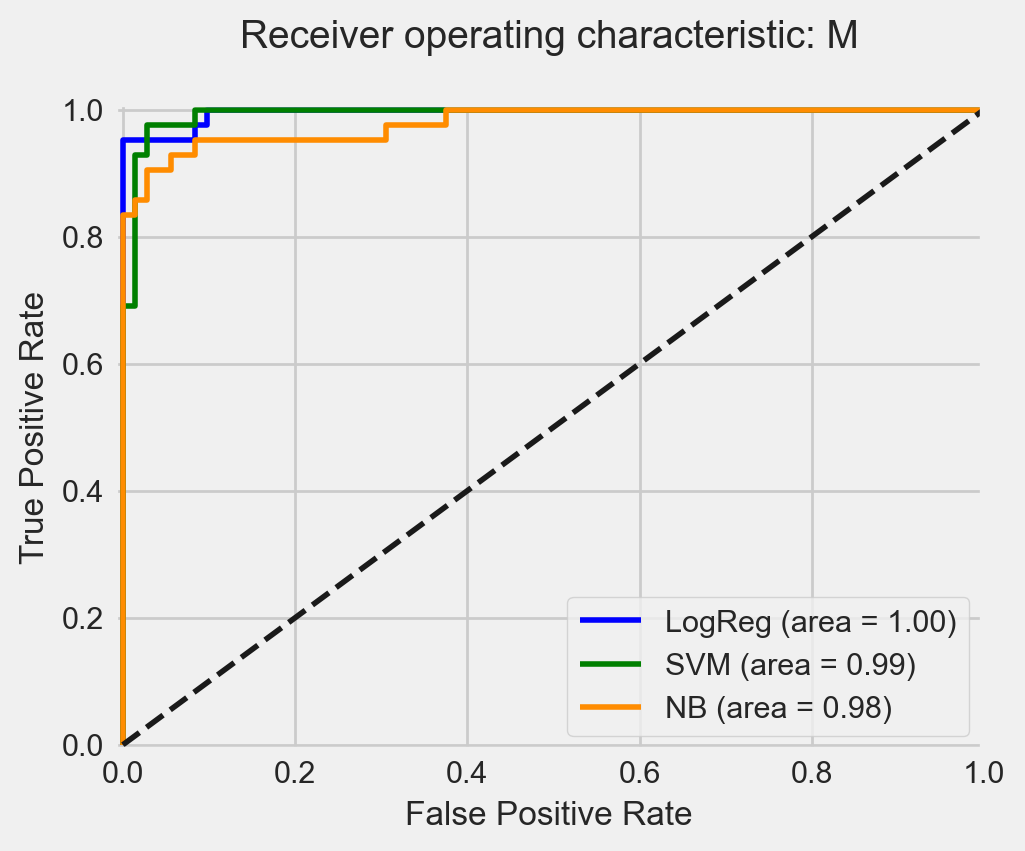

In [135]:
# Plot ROC curve for all 3 models
lr_fpr, lr_tpr, _ = metrics.roc_curve(y_test, lr_y_pred_proba[:,1]) #_: threshold
lr_roc_auc = metrics.auc(lr_fpr, lr_tpr)

svm_fpr, svm_tpr, _ = metrics.roc_curve(y_test, svm_y_pred_proba[:,1]) #_: threshold
svm_roc_auc = metrics.auc(svm_fpr, svm_tpr)

nb_fpr, nb_tpr, _ = metrics.roc_curve(y_test, nb_y_pred_proba[:,1]) #_: threshold
nb_roc_auc = metrics.auc(nb_fpr, nb_tpr)

plt.figure(figsize=(5,4))
plt.plot(lr_fpr, lr_tpr, color='blue', lw = 2, label = f'LogReg (area = {lr_roc_auc:0.2f})')
plt.plot(svm_fpr, svm_tpr, color='green', lw = 2, label = f'SVM (area = {svm_roc_auc:0.2f})')
plt.plot(nb_fpr, nb_tpr, color='darkorange', lw = 2, label = f'NB (area = {nb_roc_auc:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver operating characteristic: M', pad=20, fontsize=14)
plt.legend(loc="lower right");

### 7. [BONUS] Learning Curve

A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. If both the validation score and the training score converge to a value that is too low with increasing size of the training set, we will not benefit much from more training data.

Plot "learning curves" for the best models of each. This is a great way see how training/testing size affects the scores. Look at the documentation for how to use this function in sklearn.

http://scikit-learn.org/stable/modules/learning_curve.html#learning-curves

In [142]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [168]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(5,4))
    plt.grid()
    if ylim is not None:
        plt.ylim(*ylim)
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.title(title, fontsize = 14)
    plt.xlabel("Training examples", fontsize = 12)
    plt.ylabel("Score", fontsize = 12)
    plt.legend(loc="lower left")
    
    return plt

In [169]:
# Data
target_col = 'diagnosis'
feature_cols = [c for c in breast_cancer.columns if c != target_col]

X = breast_cancer[feature_cols]
y = breast_cancer[target_col]

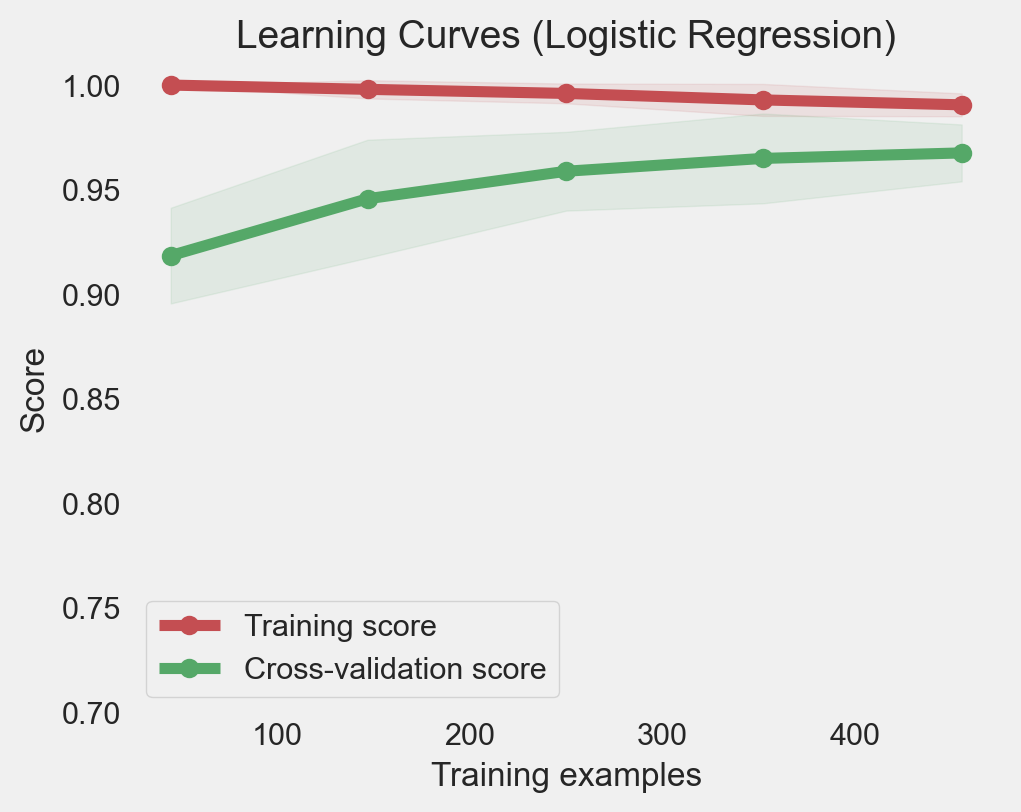

In [170]:
# Learning curve LogReg
title = "Learning Curves (Logistic Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=1)
estimator = LogisticRegression(C = 70.17038286703837, penalty = 'l1', solver = 'liblinear')

plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4);

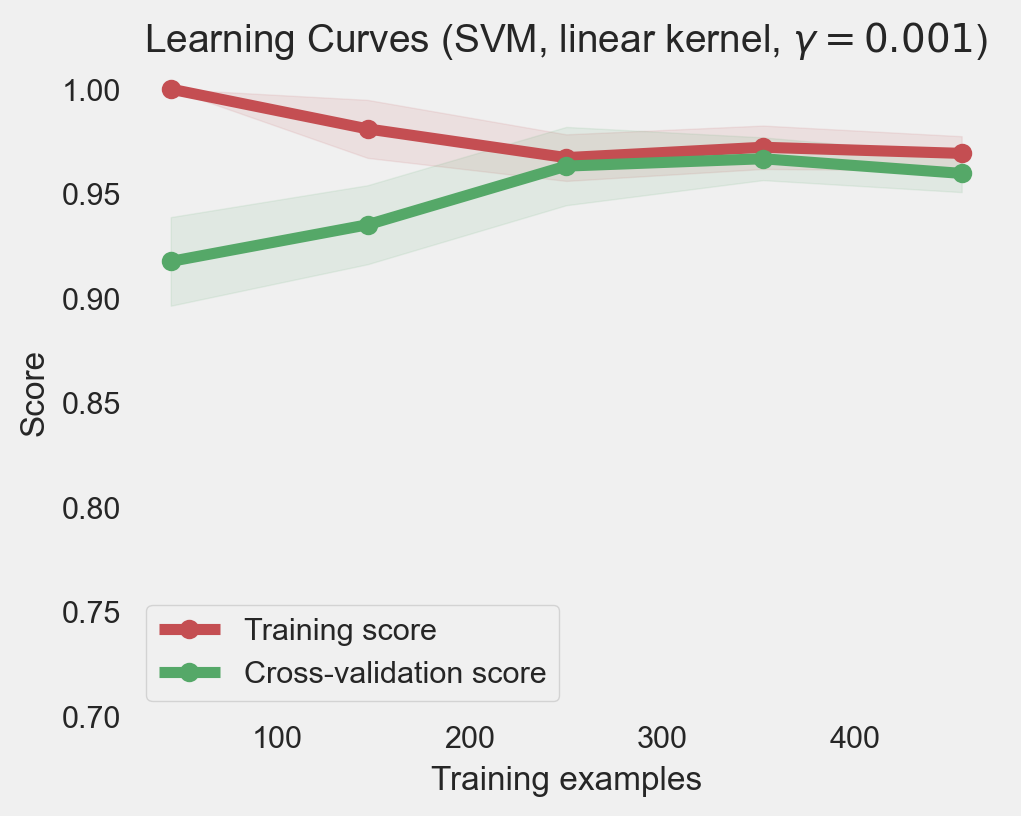

In [156]:
# Learning curve SVM
title = r"Learning Curves (SVM, linear kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=1)
estimator = SVC(C=27.825594022071257, gamma=1e-05, kernel = 'linear')

plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4);

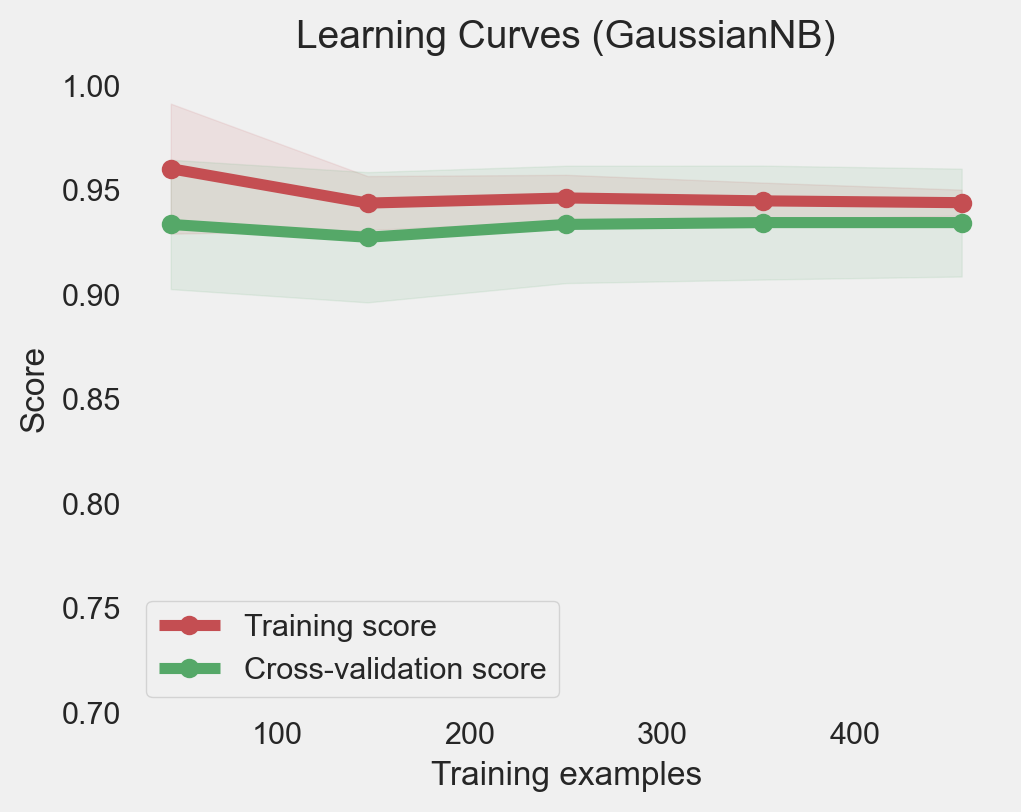

In [167]:
# Learning curve GaussianNB
title = "Learning Curves (GaussianNB)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=1)
estimator = GaussianNB()

plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4);

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)

[In-Depth: Support Vector Machines](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

[Understanding Support Vector Machine algorithm from examples (along with code)](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)

[Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



